#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Purchase'}>, <Axes: >]], dtype=object)

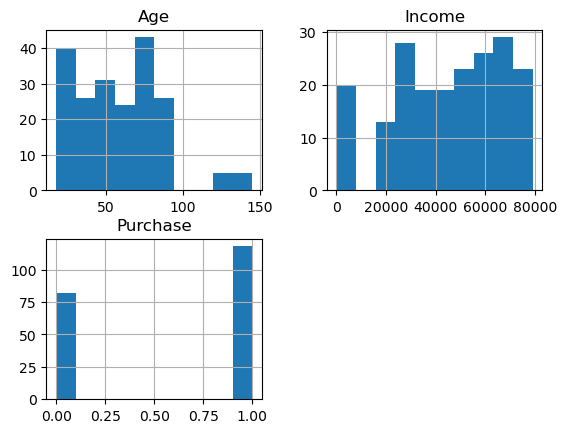

In [7]:
import pandas as pd
df=pd.read_csv('data/sample_data_with_outliers.csv')
df.hist()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Purchase'}>, <Axes: >]], dtype=object)

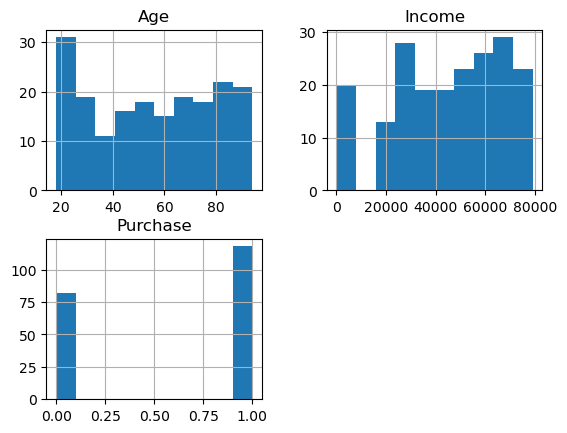

In [19]:
 #190 vs 200
df['Age']= df['Age'][df['Age'].values<100]
df.hist()

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


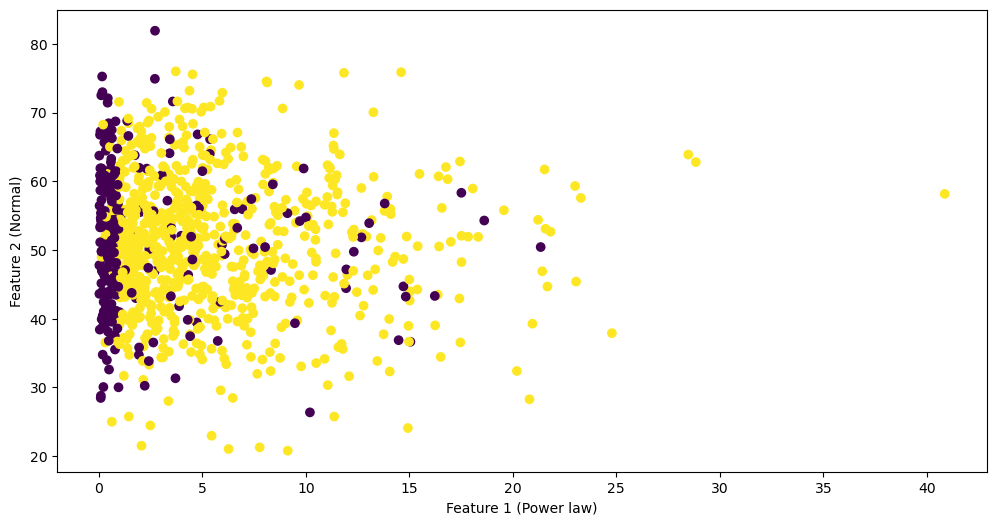

In [23]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)


# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


In [29]:
scaler = StandardScaler()
x1_scaled = scaler.fit_transform(X1)




ValueError: Expected 2D array, got 1D array instead:
array=[2.34634045e+00 1.50506072e+01 6.58372847e+00 4.56471277e+00
 8.48124352e-01 8.47981460e-01 2.99193843e-01 1.00561543e+01
 4.59541077e+00 6.15625031e+00 1.03996540e-01 1.75177874e+01
 8.93214772e+00 1.19343813e+00 1.00339494e+00 1.01305711e+00
 1.81376865e+00 3.71963915e+00 2.82768533e+00 1.72111496e+00
 4.73185437e+00 7.51172644e-01 1.72757756e+00 2.28138609e+00
 3.04467344e+00 7.68968006e+00 1.11367931e+00 3.61014578e+00
 4.48752361e+00 2.37819249e-01 4.67666510e+00 9.34806260e-01
 3.36319654e-01 1.48684390e+01 1.68531517e+01 8.26165786e+00
 1.81643930e+00 5.13886575e-01 5.76375382e+00 2.90045421e+00
 6.50761170e-01 3.41773614e+00 1.74968607e-01 1.20021144e+01
 1.49728888e+00 5.43127899e+00 1.86773291e+00 3.67055448e+00
 3.95611899e+00 1.02194300e+00 1.74640357e+01 7.46122689e+00
 1.40254721e+01 1.12607600e+01 4.55527206e+00 1.27471769e+01
 4.63277295e-01 1.09067347e+00 2.31409828e-01 1.96766043e+00
 2.46065146e+00 1.58280222e+00 8.82278933e+00 2.20613500e+00
 1.64901420e+00 3.91203542e+00 7.59490739e-01 8.10241798e+00
 3.87379344e-01 2.16707317e+01 7.39741888e+00 1.10769720e+00
 2.76871019e-02 8.44948389e+00 6.13547954e+00 6.52831454e+00
 7.37607263e+00 3.84646328e-01 2.21946336e+00 6.15750523e-01
 9.94264786e+00 4.88150596e+00 2.00909401e+00 3.28340329e-01
 1.86244175e+00 1.96657107e+00 6.53937892e+00 5.07444679e+00
 1.09112596e+01 3.19533067e+00 6.36861968e-01 6.24563172e+00
 7.15196377e+00 4.11943747e+00 7.36944983e+00 3.40407366e+00
 3.69839419e+00 2.78907097e+00 1.28738870e-01 5.70837176e-01
 1.59668406e-01 5.05864775e+00 1.88698354e+00 3.55218589e+00
 1.19063276e+01 1.43369411e+00 2.64140987e+00 7.04374574e+00
 1.29902578e+00 4.00521393e-01 1.71070152e+00 8.79041793e-01
 1.32747504e+01 8.25443540e+00 5.01747095e+00 1.02575987e+01
 8.13984470e+00 1.03247738e+00 1.11540670e+01 3.87549951e+00
 8.23674146e+00 1.13212132e+01 1.91365358e+00 5.82960801e-01
 1.29343373e+00 2.78528846e+00 8.51914863e+00 9.85672486e+00
 3.48820459e-02 3.57438080e+00 2.70136660e+00 1.25583669e+00
 6.38401958e-01 2.05954290e+00 1.43156056e+01 1.95191901e+00
 3.65726403e+00 6.07043488e+00 2.25987249e+00 1.78389907e+01
 1.64100493e+01 1.45030647e+00 3.43829639e+00 1.78965230e+00
 1.67624838e+00 1.87922389e-01 4.70246035e+00 3.49259816e+00
 2.64255437e-01 1.63312961e+00 1.19443048e+01 1.36930276e+00
 7.82654305e-01 3.36136055e+00 2.12201849e+01 1.38572407e+00
 5.57577505e+00 7.16943813e+00 1.35666586e+00 6.51374464e+00
 2.29261400e+00 5.00251874e+00 5.01918914e+00 3.83692625e+00
 4.73145794e-01 9.01822397e+00 1.93405147e+00 1.03216053e+00
 2.08148799e-01 4.46889202e+00 5.65925867e+00 8.36347378e-02
 3.58815292e+00 1.28412074e+00 5.18062171e+00 9.58021113e-01
 5.87106264e+00 2.44479350e+00 1.38017191e+01 7.39722067e-01
 2.08566217e+00 6.02221425e-01 1.29309520e+01 1.04916685e+01
 1.49163685e+00 5.39381370e+00 8.49742036e+00 4.05066180e+00
 3.77139705e+00 1.38438523e+00 4.88630702e-01 1.13756161e+01
 1.15338721e+01 5.01334960e+00 2.07023255e+00 2.14783808e+00
 6.47232715e+00 1.13704867e+01 1.09056628e+01 7.56781096e+00
 5.13655347e+00 4.39458631e-01 8.81471073e-01 1.14411525e+01
 4.66246973e+00 4.61980281e-02 5.34984507e-01 5.44581194e+00
 2.53721853e-02 8.76579081e-01 3.97848923e+00 5.88657643e+00
 5.27720741e+00 1.26974934e+00 6.22708644e+00 1.35411880e+00
 1.96817454e+00 6.86178776e+00 5.24386907e+00 9.45978039e+00
 5.35906644e+00 4.20022153e+00 4.91785307e-01 2.29208154e+00
 1.54080074e+00 1.39850102e+00 1.80615470e+01 2.49693749e+00
 1.11302761e+01 4.98667193e+00 7.91912626e+00 3.49217662e+00
 4.30077951e+00 3.39146717e+00 1.08607448e+00 6.40880902e+00
 1.64788684e+00 1.23082405e-01 5.18484393e+00 9.74667851e-01
 1.41054157e+01 1.53878121e+01 1.23175494e+01 2.31143698e+00
 7.78865769e-02 1.31776173e+01 2.79469139e+00 1.70042101e+01
 1.65686774e+01 9.58693509e+00 1.74388034e+00 2.43145966e+00
 9.52363326e+00 1.90573116e+00 9.28593081e-01 4.06868496e+00
 1.37564674e+01 5.95412799e+00 4.22056168e+00 5.11140987e-01
 4.77265358e+00 2.30528487e+01 7.54602933e-01 3.65247662e+00
 1.04930432e+01 6.75017124e+00 5.97037213e+00 6.06143778e+00
 2.22746171e+00 1.73781042e+00 8.28687254e+00 8.30664100e+00
 1.00897502e+01 1.22230798e+01 3.58046618e+00 3.48092189e+00
 8.00474966e+00 5.24859537e+00 6.05275324e+00 7.94309737e+00
 1.10366174e+01 2.06241204e+00 2.35468394e+00 4.93480196e-01
 4.31707013e+00 1.83020521e-01 3.13303474e+00 3.91147293e+00
 1.68815330e+00 4.46816265e+00 1.54875311e-01 1.90317496e-01
 8.64675685e+00 2.23292512e+00 6.79445206e-01 3.69326794e+00
 7.34823970e+00 1.21559002e+00 4.87609809e+00 4.46055145e-01
 2.65325480e-01 3.78954470e+00 3.88955221e+00 5.07268724e+00
 6.47480281e+00 1.86177850e+01 3.63145560e+00 1.95009857e+00
 7.92826990e+00 1.57925733e+00 2.88991716e+00 4.08525843e-01
 1.28388048e-01 1.64368996e+01 9.03883821e+00 5.95321366e+00
 2.62929822e+00 9.51532681e-01 8.50603708e-01 1.44002995e+00
 3.98395324e+00 6.26924644e+00 5.39695175e+00 1.64206131e+00
 1.54905175e+01 6.69508702e+00 4.04115241e+00 4.73015236e+00
 2.72018933e+00 1.42330646e+00 2.20007065e+00 7.09090924e+00
 7.24903986e-02 6.16901961e-01 2.35471885e-01 2.07907260e-01
 9.67101517e+00 6.08120306e+00 3.21392297e+00 5.14784592e-01
 3.38258983e+00 3.20725166e+00 9.50973564e-01 2.84449566e+00
 2.54168307e+00 4.78361216e+00 5.04057268e+00 2.31811620e-01
 2.34692002e+00 4.91562497e+00 3.49719726e+00 9.70674727e+00
 5.37487382e+00 8.89264344e-01 3.65912181e-01 5.14197074e+00
 1.34345363e-01 4.40673689e+00 1.40862773e+01 4.28391223e+00
 2.45650346e+00 5.15413579e+00 3.06477987e+00 3.94407180e+00
 1.41906357e+01 2.43963764e+00 1.62454593e+01 1.17878809e+01
 1.08948130e+00 3.59420777e-01 5.31126677e-01 9.19494392e-02
 4.96025058e-01 5.74437436e+00 3.69248135e-01 1.92078594e+00
 9.31763020e+00 1.17735016e-01 8.42265253e+00 1.65541733e+00
 6.28750599e-01 5.96577704e+00 4.95699588e+00 1.04970791e+01
 6.64146789e+00 8.13497903e+00 1.65666931e+00 9.76666480e-01
 6.94378198e+00 8.22104592e+00 2.32850245e+01 2.66039677e+00
 2.32621956e+00 7.48977252e+00 2.08366835e+00 1.33506896e+01
 9.77419579e+00 2.80177805e+00 6.94892358e+00 7.02316493e+00
 5.44187594e-01 1.16422284e+01 3.51853745e+00 8.75666279e+00
 1.92867713e+00 1.12939526e+01 2.46494227e+00 5.44840331e-02
 1.17895365e+01 4.78628053e-01 1.92326817e+00 1.49848619e+01
 1.50397477e+01 4.25998646e+00 4.99615040e+00 2.97507332e+00
 1.73511389e+00 1.99243167e+00 5.58161790e+00 6.97918937e+00
 7.84097708e+00 7.79415516e+00 4.78184733e-01 3.41024798e+00
 2.96408532e-01 3.98730658e+00 2.91277637e+00 1.09330933e+01
 2.16095810e+00 6.22529888e-01 7.71538273e-01 7.16715274e+00
 4.81452840e+00 5.33043561e-01 4.39277608e-01 6.03604236e+00
 3.77730448e-01 8.62592927e+00 6.12499877e+00 4.24243753e-01
 4.43269339e-01 2.15772928e+01 2.34418791e+00 2.31527630e+00
 8.37787702e+00 1.47108227e+01 2.13438697e+01 6.99949615e+00
 2.36010500e+00 4.35969968e-01 7.50621270e+00 4.08680204e+00
 2.76016563e+00 1.18411884e+01 5.89401040e-01 3.39252555e+00
 5.70929472e-02 3.16177185e+00 2.89752155e-01 6.32454980e-01
 6.25131160e-01 5.23784193e+00 6.85298859e+00 4.37776889e+00
 1.63736010e+01 2.34898289e+00 1.68234579e+00 1.01475127e+01
 1.26541034e+00 1.65143505e+01 6.11447218e-02 1.75126346e+01
 2.20594993e-01 1.10886061e+01 3.75071625e+00 2.47841430e+01
 3.83306880e-01 4.03554832e+00 1.74178761e+01 3.70221967e+00
 4.96314145e+00 5.94950619e+00 3.03063878e+00 4.93837087e+00
 4.38912931e+00 1.15711638e+01 2.32557309e-01 1.64921363e+00
 1.50199800e+01 1.10483791e+01 3.04087631e+00 4.83966514e+00
 1.62436710e+00 1.04202081e+00 3.11529299e+00 2.17976767e+00
 4.38121853e+00 4.04611422e-01 1.83248006e+01 2.14193279e+01
 5.98931941e+00 3.84039217e+00 1.85189651e+00 8.40453584e+00
 5.77164792e+00 8.87368271e-01 1.20915055e+01 8.64497256e+00
 1.49586926e+01 6.46802002e+00 4.75202010e+00 2.70851253e+00
 1.34950918e+01 1.00519619e+01 2.31364693e-01 1.33604084e-01
 2.36173881e+00 8.31823861e+00 2.18213773e+01 8.15047550e-01
 4.50862065e+00 2.39736850e+00 1.75185428e+01 9.22956604e+00
 9.11095023e+00 3.16207786e+00 2.67917468e+00 1.59694446e+00
 2.90134819e-01 1.00021307e+01 8.38058720e+00 4.08622280e+01
 2.84743670e+01 4.05325796e+00 7.32641545e+00 1.44808584e+01
 9.47386007e+00 1.42076222e+00 2.99413414e+00 6.91481722e-01
 1.54011189e+01 4.65923851e+00 1.29801863e+00 5.56914770e+00
 4.81335217e+00 2.21710231e+00 6.02695607e-01 5.56720642e+00
 3.67305212e+00 7.39903540e+00 3.67154930e+00 9.55885056e+00
 4.01377060e+00 4.11557290e+00 1.04637932e+01 2.58323657e+00
 7.19439777e-01 1.46025107e-01 7.03528726e+00 4.84199484e+00
 6.08832674e+00 1.19740747e+00 7.33062756e-01 7.32573813e-02
 2.15843631e+00 4.45698688e+00 2.48990934e+00 2.87659781e+00
 1.17253076e+01 2.14051307e+00 3.60762514e+00 7.65435869e+00
 2.52540066e+00 4.86545238e+00 9.91570322e+00 1.49309521e+01
 7.95409397e-01 1.30583138e+01 3.38751390e+00 1.49367727e+00
 3.07293484e+00 1.95682655e+01 3.39245646e+00 1.99308016e+00
 5.01743137e+00 1.37314234e+00 3.94476525e-01 6.89876099e-01
 6.85092120e-01 8.23799508e-01 7.47300330e-01 5.12042026e+00
 1.00373179e+00 2.12069658e+00 1.13548706e+01 3.21190571e+00
 5.50644542e+00 9.45642586e-01 1.06775490e+00 2.08636064e-01
 9.25236720e-01 1.63274059e+00 9.74059087e-01 4.64429539e-01
 6.42781067e-01 3.08814672e+00 1.15546103e+00 2.26490558e+00
 3.50002592e+00 5.86228717e+00 2.00528651e-01 8.03247122e+00
 4.94296845e+00 4.26477152e-01 1.03406735e+01 1.26834677e+01
 3.15114138e-01 1.62088422e+00 8.20467592e+00 6.89678620e+00
 1.01989816e+00 1.17449516e+00 2.31392555e+00 3.31331282e+00
 4.81500917e+00 2.30156282e+00 3.10445555e+00 6.88114470e+00
 1.86864762e-01 1.45468311e+00 6.24745937e+00 1.12788338e+01
 3.58389556e+00 3.79764751e+00 5.66806693e-01 2.96571623e+00
 3.80303400e+00 1.38846402e+00 1.56837306e+00 2.36832492e+00
 1.01376804e-01 1.94362381e+00 1.18778468e+00 1.98374615e+00
 6.37815516e-01 1.10603995e+01 4.50199407e+00 5.68316479e+00
 7.78354516e+00 3.45018211e+00 4.54660473e-01 3.85129182e+00
 4.41961529e+00 6.84108324e+00 2.82517325e+00 6.82423334e-01
 1.66881090e+00 2.25557413e+00 5.19112306e+00 4.22890861e+00
 2.20103380e+00 2.15309789e+01 4.65416504e+00 1.35397264e+00
 5.36715023e-01 8.29441463e-01 1.41153425e+00 8.75824375e-01
 1.03245873e+00 1.67802924e+00 9.52012168e-01 1.13537572e+01
 4.18178563e-01 3.71706175e+00 2.64152778e+00 2.01932108e+01
 5.94136728e-01 2.53628997e+00 1.74452983e+01 1.00312203e+01
 8.49331517e+00 1.49137542e+00 9.36997664e-01 5.52279799e+00
 1.32519255e+01 4.06825211e+00 4.23863781e+00 1.64237515e+00
 7.33736879e+00 1.03538991e+00 1.95543907e+00 2.77072275e+00
 3.54242481e+00 1.38806292e+00 6.09916361e-01 4.71599829e+00
 1.70281684e+00 4.35226534e+00 8.38323764e-01 3.28060689e+00
 3.80273624e+00 2.66073257e-01 2.05191801e+00 7.21746634e-01
 3.27361294e-01 2.30060066e+01 1.94565011e+00 8.30035307e+00
 1.46944417e+00 5.72070676e+00 7.14033111e+00 4.52723297e+00
 3.18928322e+00 2.65378907e+00 2.14521651e+00 1.32627802e+01
 8.87803536e+00 1.67658819e+01 6.63642709e-01 6.56275682e+00
 1.39306363e+01 9.99779049e-01 3.44051587e-01 6.75696577e+00
 4.27213572e+00 9.22038571e+00 7.52791232e-01 7.93025056e+00
 1.12589887e+00 8.93575995e-01 8.97223283e-01 8.42551641e+00
 5.47106820e+00 3.70187978e+00 2.22230701e+00 1.04860133e+01
 2.49156375e+00 8.48041331e+00 2.89137441e+00 2.36559783e+00
 3.10580530e+00 1.79322638e+00 6.88388656e+00 3.49301408e+00
 1.32121265e+00 1.14916992e+01 2.42165871e+00 3.92141191e+00
 1.18474780e+01 4.89399652e+00 6.21573079e-01 1.40530834e+01
 4.94038464e+00 2.03913158e+00 7.49884103e-01 7.90000698e+00
 4.83887754e+00 3.81206929e+00 1.12165167e+01 7.76995007e+00
 8.22456601e-01 1.86781276e+00 1.42834809e+00 6.81184031e+00
 1.70537699e-01 4.21856778e+00 7.18706858e+00 1.04683367e+01
 2.09337297e+00 8.60903982e+00 5.86219425e-01 9.36871979e+00
 6.81898153e-01 2.53157316e+00 7.98002682e+00 8.12108950e-01
 1.30196511e+00 6.40521549e+00 6.36548086e+00 5.12422104e+00
 5.92000855e+00 3.91234551e+00 1.45041850e+00 2.12091597e+00
 1.00200637e+00 1.19543807e+01 4.37804527e+00 2.56122830e+00
 3.09953753e+00 1.47141187e+01 8.32347751e-01 4.41222305e+00
 3.52497220e+00 4.72672159e+00 9.13809020e-02 1.02834676e+01
 1.34499427e+01 4.16357732e+00 5.96435370e+00 1.27873468e+01
 6.14198727e+00 8.27552546e-01 4.29351075e+00 4.66610429e+00
 2.75937252e+00 6.66745152e+00 1.36183844e+01 1.29893811e+01
 2.99682148e+00 6.00893523e-01 2.09458699e+01 9.12859055e+00
 6.65729799e-01 1.26815397e+01 1.01971197e+01 3.65775693e+00
 4.47356893e+00 2.54582422e+00 2.81590746e-01 2.04132443e+00
 8.11903956e+00 2.32139203e-02 2.02856948e+00 2.53889047e+00
 3.85441512e+00 1.26196274e+01 2.12588555e+00 2.13053243e+00
 6.68754476e+00 3.00938887e+00 1.27191237e+00 3.01141175e+00
 7.59099610e-01 9.70272516e-01 3.44944021e+00 2.71438108e+00
 1.23164637e+01 2.25017292e+00 4.34451192e+00 5.00195386e+00
 6.59047241e-02 5.44634099e+00 9.80293201e-01 1.62299914e+01
 8.04734522e-01 2.67750557e+00 4.46067188e-01 2.88404081e+01
 3.48773433e+00 4.52409662e+00 3.47160254e-01 6.93068128e+00
 1.17801419e+00 1.14165743e+01 1.14794414e+00 1.05785215e+00
 1.86171709e-01 3.19392897e+00 4.16022052e+00 3.39834701e-01
 7.47001297e+00 3.01917325e+00 3.71578827e+00 2.90590736e+00
 2.56049101e+00 4.10081729e+00 8.43515034e-01 1.00402543e+00
 9.89474664e+00 1.46045585e+01 2.33651094e+00 1.57865683e+00
 5.16411633e+00 2.62744784e+00 1.28570744e-01 8.48918016e-01
 6.29341630e+00 5.37824891e+00 1.37349289e-01 1.25496487e+00
 1.31380789e+00 5.57207361e+00 9.95369065e-02 5.49680293e-01
 8.04509214e+00 9.83388547e-01 5.28849544e+00 1.36024311e+00
 5.23700167e-01 1.39309758e+00 6.40547407e+00 9.67918169e+00
 8.86625500e+00 2.53071245e+00 5.51438389e+00 1.14696705e+00
 1.73466794e+00 1.13329931e+01 6.54359420e-02 4.46935698e-01
 1.16525140e+00 1.34452676e-01 1.00101502e+00 4.37384364e+00
 2.73593159e+00 1.11593151e+01 8.50347952e+00 2.09136403e+00
 1.50163126e+00 2.38769904e+00 4.46158875e+00 1.56030855e+00
 4.89281123e+00 2.63318020e+00 4.01533683e+00 2.86462698e+00
 1.74399988e+00 1.48263361e+01 7.21127252e+00 7.54772491e-01
 1.01425246e+01 3.34160165e+00 1.12476975e+01 8.04357227e+00
 2.76878310e+00 1.13627947e-01 1.56450274e+00 3.90043878e+00
 5.01848666e+00 1.49127340e+00 7.50372094e-01 9.00693544e+00
 2.08031208e+01 3.72947273e+00 9.41774318e-01 1.58938236e+00
 9.28094371e-02 1.22844426e+01 6.26405219e-01 4.29620334e+00
 1.60140664e+00 4.03917758e+00 5.26944317e+00 8.85219596e+00
 1.15601264e+00 5.52836482e-02 7.36040353e-01 1.15138576e+01
 1.03530068e+01 4.54922155e+00 4.58791859e+00 5.46867115e+00
 9.64110143e-01 1.22910478e+01 2.71304817e+00 2.41555400e+00
 3.65858466e+00 2.40523321e-01 9.09308525e-01 6.69769545e+00
 4.32141378e-01 4.62101109e+00 1.40750017e+00 2.46571128e+00
 1.70326096e+00 2.19774239e+00 6.34781993e+00 1.76285770e+00
 4.17821765e+00 3.23179893e+00 5.44832962e+00 1.38096082e+01
 6.59452636e+00 1.20997807e+00 1.58398394e-01 1.52084651e+00
 4.52030326e+00 2.63976390e-01 3.42952978e+00 4.54214420e+00
 2.03415939e+00 7.36824980e+00 5.63594574e-01 3.90552529e-01
 6.51323705e+00 3.42085113e+00 5.83021328e+00 2.85312000e+00
 1.41448127e+00 8.54911849e+00 8.03260782e+00 5.93224410e+00
 1.58826807e+00 4.46080440e+00 2.23904988e+00 4.80253673e-01
 1.24634992e+01 7.35652244e-01 1.50024533e+01 2.95300506e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [28]:
scaler = StandardScaler()
x1_scaled = scaler.fit_transform(X1)
x1_scaled

ValueError: Expected 2D array, got 1D array instead:
array=[2.34634045e+00 1.50506072e+01 6.58372847e+00 4.56471277e+00
 8.48124352e-01 8.47981460e-01 2.99193843e-01 1.00561543e+01
 4.59541077e+00 6.15625031e+00 1.03996540e-01 1.75177874e+01
 8.93214772e+00 1.19343813e+00 1.00339494e+00 1.01305711e+00
 1.81376865e+00 3.71963915e+00 2.82768533e+00 1.72111496e+00
 4.73185437e+00 7.51172644e-01 1.72757756e+00 2.28138609e+00
 3.04467344e+00 7.68968006e+00 1.11367931e+00 3.61014578e+00
 4.48752361e+00 2.37819249e-01 4.67666510e+00 9.34806260e-01
 3.36319654e-01 1.48684390e+01 1.68531517e+01 8.26165786e+00
 1.81643930e+00 5.13886575e-01 5.76375382e+00 2.90045421e+00
 6.50761170e-01 3.41773614e+00 1.74968607e-01 1.20021144e+01
 1.49728888e+00 5.43127899e+00 1.86773291e+00 3.67055448e+00
 3.95611899e+00 1.02194300e+00 1.74640357e+01 7.46122689e+00
 1.40254721e+01 1.12607600e+01 4.55527206e+00 1.27471769e+01
 4.63277295e-01 1.09067347e+00 2.31409828e-01 1.96766043e+00
 2.46065146e+00 1.58280222e+00 8.82278933e+00 2.20613500e+00
 1.64901420e+00 3.91203542e+00 7.59490739e-01 8.10241798e+00
 3.87379344e-01 2.16707317e+01 7.39741888e+00 1.10769720e+00
 2.76871019e-02 8.44948389e+00 6.13547954e+00 6.52831454e+00
 7.37607263e+00 3.84646328e-01 2.21946336e+00 6.15750523e-01
 9.94264786e+00 4.88150596e+00 2.00909401e+00 3.28340329e-01
 1.86244175e+00 1.96657107e+00 6.53937892e+00 5.07444679e+00
 1.09112596e+01 3.19533067e+00 6.36861968e-01 6.24563172e+00
 7.15196377e+00 4.11943747e+00 7.36944983e+00 3.40407366e+00
 3.69839419e+00 2.78907097e+00 1.28738870e-01 5.70837176e-01
 1.59668406e-01 5.05864775e+00 1.88698354e+00 3.55218589e+00
 1.19063276e+01 1.43369411e+00 2.64140987e+00 7.04374574e+00
 1.29902578e+00 4.00521393e-01 1.71070152e+00 8.79041793e-01
 1.32747504e+01 8.25443540e+00 5.01747095e+00 1.02575987e+01
 8.13984470e+00 1.03247738e+00 1.11540670e+01 3.87549951e+00
 8.23674146e+00 1.13212132e+01 1.91365358e+00 5.82960801e-01
 1.29343373e+00 2.78528846e+00 8.51914863e+00 9.85672486e+00
 3.48820459e-02 3.57438080e+00 2.70136660e+00 1.25583669e+00
 6.38401958e-01 2.05954290e+00 1.43156056e+01 1.95191901e+00
 3.65726403e+00 6.07043488e+00 2.25987249e+00 1.78389907e+01
 1.64100493e+01 1.45030647e+00 3.43829639e+00 1.78965230e+00
 1.67624838e+00 1.87922389e-01 4.70246035e+00 3.49259816e+00
 2.64255437e-01 1.63312961e+00 1.19443048e+01 1.36930276e+00
 7.82654305e-01 3.36136055e+00 2.12201849e+01 1.38572407e+00
 5.57577505e+00 7.16943813e+00 1.35666586e+00 6.51374464e+00
 2.29261400e+00 5.00251874e+00 5.01918914e+00 3.83692625e+00
 4.73145794e-01 9.01822397e+00 1.93405147e+00 1.03216053e+00
 2.08148799e-01 4.46889202e+00 5.65925867e+00 8.36347378e-02
 3.58815292e+00 1.28412074e+00 5.18062171e+00 9.58021113e-01
 5.87106264e+00 2.44479350e+00 1.38017191e+01 7.39722067e-01
 2.08566217e+00 6.02221425e-01 1.29309520e+01 1.04916685e+01
 1.49163685e+00 5.39381370e+00 8.49742036e+00 4.05066180e+00
 3.77139705e+00 1.38438523e+00 4.88630702e-01 1.13756161e+01
 1.15338721e+01 5.01334960e+00 2.07023255e+00 2.14783808e+00
 6.47232715e+00 1.13704867e+01 1.09056628e+01 7.56781096e+00
 5.13655347e+00 4.39458631e-01 8.81471073e-01 1.14411525e+01
 4.66246973e+00 4.61980281e-02 5.34984507e-01 5.44581194e+00
 2.53721853e-02 8.76579081e-01 3.97848923e+00 5.88657643e+00
 5.27720741e+00 1.26974934e+00 6.22708644e+00 1.35411880e+00
 1.96817454e+00 6.86178776e+00 5.24386907e+00 9.45978039e+00
 5.35906644e+00 4.20022153e+00 4.91785307e-01 2.29208154e+00
 1.54080074e+00 1.39850102e+00 1.80615470e+01 2.49693749e+00
 1.11302761e+01 4.98667193e+00 7.91912626e+00 3.49217662e+00
 4.30077951e+00 3.39146717e+00 1.08607448e+00 6.40880902e+00
 1.64788684e+00 1.23082405e-01 5.18484393e+00 9.74667851e-01
 1.41054157e+01 1.53878121e+01 1.23175494e+01 2.31143698e+00
 7.78865769e-02 1.31776173e+01 2.79469139e+00 1.70042101e+01
 1.65686774e+01 9.58693509e+00 1.74388034e+00 2.43145966e+00
 9.52363326e+00 1.90573116e+00 9.28593081e-01 4.06868496e+00
 1.37564674e+01 5.95412799e+00 4.22056168e+00 5.11140987e-01
 4.77265358e+00 2.30528487e+01 7.54602933e-01 3.65247662e+00
 1.04930432e+01 6.75017124e+00 5.97037213e+00 6.06143778e+00
 2.22746171e+00 1.73781042e+00 8.28687254e+00 8.30664100e+00
 1.00897502e+01 1.22230798e+01 3.58046618e+00 3.48092189e+00
 8.00474966e+00 5.24859537e+00 6.05275324e+00 7.94309737e+00
 1.10366174e+01 2.06241204e+00 2.35468394e+00 4.93480196e-01
 4.31707013e+00 1.83020521e-01 3.13303474e+00 3.91147293e+00
 1.68815330e+00 4.46816265e+00 1.54875311e-01 1.90317496e-01
 8.64675685e+00 2.23292512e+00 6.79445206e-01 3.69326794e+00
 7.34823970e+00 1.21559002e+00 4.87609809e+00 4.46055145e-01
 2.65325480e-01 3.78954470e+00 3.88955221e+00 5.07268724e+00
 6.47480281e+00 1.86177850e+01 3.63145560e+00 1.95009857e+00
 7.92826990e+00 1.57925733e+00 2.88991716e+00 4.08525843e-01
 1.28388048e-01 1.64368996e+01 9.03883821e+00 5.95321366e+00
 2.62929822e+00 9.51532681e-01 8.50603708e-01 1.44002995e+00
 3.98395324e+00 6.26924644e+00 5.39695175e+00 1.64206131e+00
 1.54905175e+01 6.69508702e+00 4.04115241e+00 4.73015236e+00
 2.72018933e+00 1.42330646e+00 2.20007065e+00 7.09090924e+00
 7.24903986e-02 6.16901961e-01 2.35471885e-01 2.07907260e-01
 9.67101517e+00 6.08120306e+00 3.21392297e+00 5.14784592e-01
 3.38258983e+00 3.20725166e+00 9.50973564e-01 2.84449566e+00
 2.54168307e+00 4.78361216e+00 5.04057268e+00 2.31811620e-01
 2.34692002e+00 4.91562497e+00 3.49719726e+00 9.70674727e+00
 5.37487382e+00 8.89264344e-01 3.65912181e-01 5.14197074e+00
 1.34345363e-01 4.40673689e+00 1.40862773e+01 4.28391223e+00
 2.45650346e+00 5.15413579e+00 3.06477987e+00 3.94407180e+00
 1.41906357e+01 2.43963764e+00 1.62454593e+01 1.17878809e+01
 1.08948130e+00 3.59420777e-01 5.31126677e-01 9.19494392e-02
 4.96025058e-01 5.74437436e+00 3.69248135e-01 1.92078594e+00
 9.31763020e+00 1.17735016e-01 8.42265253e+00 1.65541733e+00
 6.28750599e-01 5.96577704e+00 4.95699588e+00 1.04970791e+01
 6.64146789e+00 8.13497903e+00 1.65666931e+00 9.76666480e-01
 6.94378198e+00 8.22104592e+00 2.32850245e+01 2.66039677e+00
 2.32621956e+00 7.48977252e+00 2.08366835e+00 1.33506896e+01
 9.77419579e+00 2.80177805e+00 6.94892358e+00 7.02316493e+00
 5.44187594e-01 1.16422284e+01 3.51853745e+00 8.75666279e+00
 1.92867713e+00 1.12939526e+01 2.46494227e+00 5.44840331e-02
 1.17895365e+01 4.78628053e-01 1.92326817e+00 1.49848619e+01
 1.50397477e+01 4.25998646e+00 4.99615040e+00 2.97507332e+00
 1.73511389e+00 1.99243167e+00 5.58161790e+00 6.97918937e+00
 7.84097708e+00 7.79415516e+00 4.78184733e-01 3.41024798e+00
 2.96408532e-01 3.98730658e+00 2.91277637e+00 1.09330933e+01
 2.16095810e+00 6.22529888e-01 7.71538273e-01 7.16715274e+00
 4.81452840e+00 5.33043561e-01 4.39277608e-01 6.03604236e+00
 3.77730448e-01 8.62592927e+00 6.12499877e+00 4.24243753e-01
 4.43269339e-01 2.15772928e+01 2.34418791e+00 2.31527630e+00
 8.37787702e+00 1.47108227e+01 2.13438697e+01 6.99949615e+00
 2.36010500e+00 4.35969968e-01 7.50621270e+00 4.08680204e+00
 2.76016563e+00 1.18411884e+01 5.89401040e-01 3.39252555e+00
 5.70929472e-02 3.16177185e+00 2.89752155e-01 6.32454980e-01
 6.25131160e-01 5.23784193e+00 6.85298859e+00 4.37776889e+00
 1.63736010e+01 2.34898289e+00 1.68234579e+00 1.01475127e+01
 1.26541034e+00 1.65143505e+01 6.11447218e-02 1.75126346e+01
 2.20594993e-01 1.10886061e+01 3.75071625e+00 2.47841430e+01
 3.83306880e-01 4.03554832e+00 1.74178761e+01 3.70221967e+00
 4.96314145e+00 5.94950619e+00 3.03063878e+00 4.93837087e+00
 4.38912931e+00 1.15711638e+01 2.32557309e-01 1.64921363e+00
 1.50199800e+01 1.10483791e+01 3.04087631e+00 4.83966514e+00
 1.62436710e+00 1.04202081e+00 3.11529299e+00 2.17976767e+00
 4.38121853e+00 4.04611422e-01 1.83248006e+01 2.14193279e+01
 5.98931941e+00 3.84039217e+00 1.85189651e+00 8.40453584e+00
 5.77164792e+00 8.87368271e-01 1.20915055e+01 8.64497256e+00
 1.49586926e+01 6.46802002e+00 4.75202010e+00 2.70851253e+00
 1.34950918e+01 1.00519619e+01 2.31364693e-01 1.33604084e-01
 2.36173881e+00 8.31823861e+00 2.18213773e+01 8.15047550e-01
 4.50862065e+00 2.39736850e+00 1.75185428e+01 9.22956604e+00
 9.11095023e+00 3.16207786e+00 2.67917468e+00 1.59694446e+00
 2.90134819e-01 1.00021307e+01 8.38058720e+00 4.08622280e+01
 2.84743670e+01 4.05325796e+00 7.32641545e+00 1.44808584e+01
 9.47386007e+00 1.42076222e+00 2.99413414e+00 6.91481722e-01
 1.54011189e+01 4.65923851e+00 1.29801863e+00 5.56914770e+00
 4.81335217e+00 2.21710231e+00 6.02695607e-01 5.56720642e+00
 3.67305212e+00 7.39903540e+00 3.67154930e+00 9.55885056e+00
 4.01377060e+00 4.11557290e+00 1.04637932e+01 2.58323657e+00
 7.19439777e-01 1.46025107e-01 7.03528726e+00 4.84199484e+00
 6.08832674e+00 1.19740747e+00 7.33062756e-01 7.32573813e-02
 2.15843631e+00 4.45698688e+00 2.48990934e+00 2.87659781e+00
 1.17253076e+01 2.14051307e+00 3.60762514e+00 7.65435869e+00
 2.52540066e+00 4.86545238e+00 9.91570322e+00 1.49309521e+01
 7.95409397e-01 1.30583138e+01 3.38751390e+00 1.49367727e+00
 3.07293484e+00 1.95682655e+01 3.39245646e+00 1.99308016e+00
 5.01743137e+00 1.37314234e+00 3.94476525e-01 6.89876099e-01
 6.85092120e-01 8.23799508e-01 7.47300330e-01 5.12042026e+00
 1.00373179e+00 2.12069658e+00 1.13548706e+01 3.21190571e+00
 5.50644542e+00 9.45642586e-01 1.06775490e+00 2.08636064e-01
 9.25236720e-01 1.63274059e+00 9.74059087e-01 4.64429539e-01
 6.42781067e-01 3.08814672e+00 1.15546103e+00 2.26490558e+00
 3.50002592e+00 5.86228717e+00 2.00528651e-01 8.03247122e+00
 4.94296845e+00 4.26477152e-01 1.03406735e+01 1.26834677e+01
 3.15114138e-01 1.62088422e+00 8.20467592e+00 6.89678620e+00
 1.01989816e+00 1.17449516e+00 2.31392555e+00 3.31331282e+00
 4.81500917e+00 2.30156282e+00 3.10445555e+00 6.88114470e+00
 1.86864762e-01 1.45468311e+00 6.24745937e+00 1.12788338e+01
 3.58389556e+00 3.79764751e+00 5.66806693e-01 2.96571623e+00
 3.80303400e+00 1.38846402e+00 1.56837306e+00 2.36832492e+00
 1.01376804e-01 1.94362381e+00 1.18778468e+00 1.98374615e+00
 6.37815516e-01 1.10603995e+01 4.50199407e+00 5.68316479e+00
 7.78354516e+00 3.45018211e+00 4.54660473e-01 3.85129182e+00
 4.41961529e+00 6.84108324e+00 2.82517325e+00 6.82423334e-01
 1.66881090e+00 2.25557413e+00 5.19112306e+00 4.22890861e+00
 2.20103380e+00 2.15309789e+01 4.65416504e+00 1.35397264e+00
 5.36715023e-01 8.29441463e-01 1.41153425e+00 8.75824375e-01
 1.03245873e+00 1.67802924e+00 9.52012168e-01 1.13537572e+01
 4.18178563e-01 3.71706175e+00 2.64152778e+00 2.01932108e+01
 5.94136728e-01 2.53628997e+00 1.74452983e+01 1.00312203e+01
 8.49331517e+00 1.49137542e+00 9.36997664e-01 5.52279799e+00
 1.32519255e+01 4.06825211e+00 4.23863781e+00 1.64237515e+00
 7.33736879e+00 1.03538991e+00 1.95543907e+00 2.77072275e+00
 3.54242481e+00 1.38806292e+00 6.09916361e-01 4.71599829e+00
 1.70281684e+00 4.35226534e+00 8.38323764e-01 3.28060689e+00
 3.80273624e+00 2.66073257e-01 2.05191801e+00 7.21746634e-01
 3.27361294e-01 2.30060066e+01 1.94565011e+00 8.30035307e+00
 1.46944417e+00 5.72070676e+00 7.14033111e+00 4.52723297e+00
 3.18928322e+00 2.65378907e+00 2.14521651e+00 1.32627802e+01
 8.87803536e+00 1.67658819e+01 6.63642709e-01 6.56275682e+00
 1.39306363e+01 9.99779049e-01 3.44051587e-01 6.75696577e+00
 4.27213572e+00 9.22038571e+00 7.52791232e-01 7.93025056e+00
 1.12589887e+00 8.93575995e-01 8.97223283e-01 8.42551641e+00
 5.47106820e+00 3.70187978e+00 2.22230701e+00 1.04860133e+01
 2.49156375e+00 8.48041331e+00 2.89137441e+00 2.36559783e+00
 3.10580530e+00 1.79322638e+00 6.88388656e+00 3.49301408e+00
 1.32121265e+00 1.14916992e+01 2.42165871e+00 3.92141191e+00
 1.18474780e+01 4.89399652e+00 6.21573079e-01 1.40530834e+01
 4.94038464e+00 2.03913158e+00 7.49884103e-01 7.90000698e+00
 4.83887754e+00 3.81206929e+00 1.12165167e+01 7.76995007e+00
 8.22456601e-01 1.86781276e+00 1.42834809e+00 6.81184031e+00
 1.70537699e-01 4.21856778e+00 7.18706858e+00 1.04683367e+01
 2.09337297e+00 8.60903982e+00 5.86219425e-01 9.36871979e+00
 6.81898153e-01 2.53157316e+00 7.98002682e+00 8.12108950e-01
 1.30196511e+00 6.40521549e+00 6.36548086e+00 5.12422104e+00
 5.92000855e+00 3.91234551e+00 1.45041850e+00 2.12091597e+00
 1.00200637e+00 1.19543807e+01 4.37804527e+00 2.56122830e+00
 3.09953753e+00 1.47141187e+01 8.32347751e-01 4.41222305e+00
 3.52497220e+00 4.72672159e+00 9.13809020e-02 1.02834676e+01
 1.34499427e+01 4.16357732e+00 5.96435370e+00 1.27873468e+01
 6.14198727e+00 8.27552546e-01 4.29351075e+00 4.66610429e+00
 2.75937252e+00 6.66745152e+00 1.36183844e+01 1.29893811e+01
 2.99682148e+00 6.00893523e-01 2.09458699e+01 9.12859055e+00
 6.65729799e-01 1.26815397e+01 1.01971197e+01 3.65775693e+00
 4.47356893e+00 2.54582422e+00 2.81590746e-01 2.04132443e+00
 8.11903956e+00 2.32139203e-02 2.02856948e+00 2.53889047e+00
 3.85441512e+00 1.26196274e+01 2.12588555e+00 2.13053243e+00
 6.68754476e+00 3.00938887e+00 1.27191237e+00 3.01141175e+00
 7.59099610e-01 9.70272516e-01 3.44944021e+00 2.71438108e+00
 1.23164637e+01 2.25017292e+00 4.34451192e+00 5.00195386e+00
 6.59047241e-02 5.44634099e+00 9.80293201e-01 1.62299914e+01
 8.04734522e-01 2.67750557e+00 4.46067188e-01 2.88404081e+01
 3.48773433e+00 4.52409662e+00 3.47160254e-01 6.93068128e+00
 1.17801419e+00 1.14165743e+01 1.14794414e+00 1.05785215e+00
 1.86171709e-01 3.19392897e+00 4.16022052e+00 3.39834701e-01
 7.47001297e+00 3.01917325e+00 3.71578827e+00 2.90590736e+00
 2.56049101e+00 4.10081729e+00 8.43515034e-01 1.00402543e+00
 9.89474664e+00 1.46045585e+01 2.33651094e+00 1.57865683e+00
 5.16411633e+00 2.62744784e+00 1.28570744e-01 8.48918016e-01
 6.29341630e+00 5.37824891e+00 1.37349289e-01 1.25496487e+00
 1.31380789e+00 5.57207361e+00 9.95369065e-02 5.49680293e-01
 8.04509214e+00 9.83388547e-01 5.28849544e+00 1.36024311e+00
 5.23700167e-01 1.39309758e+00 6.40547407e+00 9.67918169e+00
 8.86625500e+00 2.53071245e+00 5.51438389e+00 1.14696705e+00
 1.73466794e+00 1.13329931e+01 6.54359420e-02 4.46935698e-01
 1.16525140e+00 1.34452676e-01 1.00101502e+00 4.37384364e+00
 2.73593159e+00 1.11593151e+01 8.50347952e+00 2.09136403e+00
 1.50163126e+00 2.38769904e+00 4.46158875e+00 1.56030855e+00
 4.89281123e+00 2.63318020e+00 4.01533683e+00 2.86462698e+00
 1.74399988e+00 1.48263361e+01 7.21127252e+00 7.54772491e-01
 1.01425246e+01 3.34160165e+00 1.12476975e+01 8.04357227e+00
 2.76878310e+00 1.13627947e-01 1.56450274e+00 3.90043878e+00
 5.01848666e+00 1.49127340e+00 7.50372094e-01 9.00693544e+00
 2.08031208e+01 3.72947273e+00 9.41774318e-01 1.58938236e+00
 9.28094371e-02 1.22844426e+01 6.26405219e-01 4.29620334e+00
 1.60140664e+00 4.03917758e+00 5.26944317e+00 8.85219596e+00
 1.15601264e+00 5.52836482e-02 7.36040353e-01 1.15138576e+01
 1.03530068e+01 4.54922155e+00 4.58791859e+00 5.46867115e+00
 9.64110143e-01 1.22910478e+01 2.71304817e+00 2.41555400e+00
 3.65858466e+00 2.40523321e-01 9.09308525e-01 6.69769545e+00
 4.32141378e-01 4.62101109e+00 1.40750017e+00 2.46571128e+00
 1.70326096e+00 2.19774239e+00 6.34781993e+00 1.76285770e+00
 4.17821765e+00 3.23179893e+00 5.44832962e+00 1.38096082e+01
 6.59452636e+00 1.20997807e+00 1.58398394e-01 1.52084651e+00
 4.52030326e+00 2.63976390e-01 3.42952978e+00 4.54214420e+00
 2.03415939e+00 7.36824980e+00 5.63594574e-01 3.90552529e-01
 6.51323705e+00 3.42085113e+00 5.83021328e+00 2.85312000e+00
 1.41448127e+00 8.54911849e+00 8.03260782e+00 5.93224410e+00
 1.58826807e+00 4.46080440e+00 2.23904988e+00 4.80253673e-01
 1.24634992e+01 7.35652244e-01 1.50024533e+01 2.95300506e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [2]:
sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})

# Your code here

NameError: name 'pd' is not defined

#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Compare your results with and without re-balancing your classes.
3. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'systolic_bp'}>],
       [<Axes: title={'center': 'diastolic_bp'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'family_history'}>],
       [<Axes: title={'center': 'shoe_size'}>,
        <Axes: title={'center': 'cholesterol_level'}>,
        <Axes: title={'center': 'risk'}>],
       [<Axes: title={'center': 'has_disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

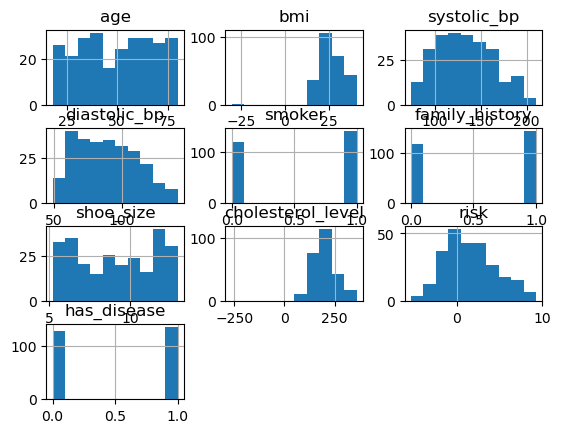

In [76]:
data= pd.read_csv('data/synthetic_patient_data.csv')
data = data.dropna()
train, test = train_test_split(data, test_size=.8, random_state= 6140)
train.hist()


In [80]:
from sklearn import tree
import numpy as np
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay
    
    
y_train = train['has_disease']
x_train= train.drop(['has_disease'], axis = 1)
x_train_num = x_train.select_dtypes(include = ['int64', 'float64'])

clf = tree.DecisionTreeClassifier()
clf.fit(x_train_num, y_train)

preds = clf.predict(x_train_num)

fpr, tpr, threshs = metrics.roc_curve(y_train, preds)

display = PrecisionRecallDisplay.from_estimator(
    clf, y_train, preds, name="DT", plot_chance_level=True)

/Users/bryce/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.